In [32]:
import time

import mysql.connector
from Params import hostSQL, userSQL, passwdSQL, databaseSQL
import os
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 

import nltk
from nltk.corpus import stopwords

import pickle

# --------------------------------------------------
 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# --------------------------------------------------
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)





In [21]:

mydb = mysql.connector.connect(
    host=hostSQL,
    user=userSQL,
    passwd=passwdSQL,
    auth_plugin='mysql_native_password',
    database=databaseSQL
)

mycursor = mydb.cursor()


In [22]:
sql = 'SELECT * FROM chatroom'
mycursor.execute(sql)
chatlog = mycursor.fetchall()

sql = 'DESCRIBE chatroom'
mycursor.execute(sql)
chatDescribe = mycursor.fetchall()

columns = []
for i in chatDescribe:
    columns.append(i[0])

df = pd.DataFrame(chatlog, columns=columns)

df['chat_line'] = df.chat_line.str[:-1]



In [39]:

stop_words = stopwords.words('english')

stop_words.extend([
    'liv',
    'im',
    'nicole',
    'heyits127joepuckers',
    'hottea1dab',
    'mercywing2',
    'mercywing1',
    'trae',
    'leylaphype',
    'leylapmario',
    'mariioo007',
    'leylaplove',
    'leylakatana',
    'footpics23',
    'rpgghosto',
    'kill199023',
    'slawscare',
    'eclairehyperbruh',
    'traebear',
    'ajvielul',
    'bryce',
    'pansexualpride',
    'hottea1tier1',
    'hottea1hottea',
    'jaina',
    'andyraemodlove',
    'lylythfaire',
    'ajvieflex',
    'leylapcozy',
    'leylaplurk',
    'evelyn',
    'cass',
    'mrandyp',
    'fizzle27',
    'laribump',
    'fbcatch',
    'evelique',
    'bankshot1321',
    'meg',
    'ellen',
    'james',
    'yogii',
    'lari',
    'livstixs',
    'bandslam',
    'hot_tea101',
    'araynebow',
    'nice'
])


channels = [
            # 'ajvie',
            # 'ayytrae',
            # 'child_of_christ666',
            # 'davinityyy',
            # 'emandliv',
            # 'hollytwolf',
            # 'hottea',
            # 'kneecoleslaw',
            # 'laribug',
            # 'leyla',
            # 'livstixs',
            # 'lizelda',
            'martinimonsters'
            # 'miss_angeliquew',
            # 'misdelish',
            # 'nataagataa',
            # 'officialevelynclaire',
            # 'pink_sparkles',
            # 'xoaeriel',
            # 'yogiibutt'
            ]


dfChat = df[df.chatchannel.isin(channels)]

dfChat = dfChat[dfChat['display_name'] != 'nightbot']

renameDict = {'chat_line': 'text'}
dfChat.rename(columns=renameDict, inplace=True)

data = dfChat.text.tolist()

stop_words.extend(dfChat.display_name.unique().tolist())

In [40]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer

porter=PorterStemmer()

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

for i in range(len(data)):
    data[i] = stemSentence(data[i])

vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(data)


np.random.seed(200)

clusters = 20
model = KMeans(n_clusters=clusters, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

dfChat = dfChat.reset_index(drop=True)

labels = pd.DataFrame(model.labels_, columns=['label'])

dfChatwLabels = pd.concat([dfChat.iloc[:,1:], labels], axis=1)


dfChatwLabels.groupby(['label']).count()



,display_name,text,sent_at,chatchannel
label,,,,
0,21,21,21,21
1,110,110,110,110
2,91,91,91,91
3,12,12,12,12
4,228,228,228,228
5,311,311,311,311
6,98,98,98,98
7,13144,13144,13144,13144
8,100,100,100,100


In [ ]:

# save the model to disk
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))


# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

In [41]:
for i in range(clusters):
    print('Cluster %d:' % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Cluster 0:
 kreygasm
 kappa
 pie
 dantes5kreygasm
 residentsleep
 vein
 fantasi
 sparca
 watermelon
 ohhhh
Cluster 1:
 love
 thi
 song
 would
 outfit
 work
 ani
 bulk
 hair
 sweat
Cluster 2:
 man
 pac
 oh
 short
 old
 gown
 like
 super
 one
 lol
Cluster 3:
 consist
 key
 among
 layer
 reebok
 mandatori
 dumbass
 show
 welp
 three
Cluster 4:
 time
 long
 first
 thi
 wa
 get
 good
 work
 go
 see
Cluster 5:
 go
 tomorrow
 get
 away
 bot
 peopl
 gym
 want
 like
 eat
Cluster 6:
 kekw
 true
 allbrokenth
 ye
 nuuuuuuuuuuuuut
 truee
 hexbar
 desog
 trueee
 np
Cluster 7:
 lol
 wa
 get
 lul
 good
 know
 think
 thi
 oh
 ye
Cluster 8:
 hey
 bot
 suck
 quit
 martini
 great
 hunni
 ky
 cassidi
 job
Cluster 9:
 thing
 get
 like
 one
 make
 good
 wa
 go
 know
 whole
Cluster 10:
 today
 work
 wa
 day
 feel
 look
 lift
 stream
 got
 martinimonst
Cluster 11:
 punchtre
 float
 cabl
 arent
 weight
 zyzz
 ex
 eww
 ew
 evolv
Cluster 12:
 day
 everi
 one
 wa
 hour
 week
 back
 like
 go
 work
Cluster 13:
 like

In [35]:
clusterNum = 13

dfChatwLabels[dfChatwLabels['label'] == clusterNum].text.tolist()

['Plus my weight has been re stressing my shins again.',
 'i have a big full of water bottles',
 'ooh Rogue Canada has free shipping on bumper sets',
 'even though he has back problems his shit is super motivating though',
 "it's trying to learn how to moderate. but it has to hang out to learn what's acceptable and what isn't. lol.",
 "how many times has the 'Easy' button been pressed already?",
 'LOve that easy button she has! thats awesome!',
 'Barry has a cool monolift bench thing I saw',
 'How has pete been? @petespence',
 'elhomero has 0 followers',
 'no way a 12 year old has these kinds of thoughts',
 'She has the implant',
 'twitch support has been awful in contacting them too, theres a streamer i used to watch who got affiliate, is really close to partner, yet has said the n word 3 seperate times saved in twitch clips, and twitch support dont care',
 "Birth control really has an impact on gains for girls. There's an article about the types and how much they screw up your gains"

In [36]:
testMsg = ['elhomero has 0 followers']

testMsg = [stemSentence(testMsg[0])]

print('Prediction')
X = vectorizer.transform(testMsg)
predicted = model.predict(X)
print(predicted)

dfChatwLabels[dfChatwLabels['label'] == predicted[0]].text.tolist()

Prediction
[13]


['Plus my weight has been re stressing my shins again.',
 'i have a big full of water bottles',
 'ooh Rogue Canada has free shipping on bumper sets',
 'even though he has back problems his shit is super motivating though',
 "it's trying to learn how to moderate. but it has to hang out to learn what's acceptable and what isn't. lol.",
 "how many times has the 'Easy' button been pressed already?",
 'LOve that easy button she has! thats awesome!',
 'Barry has a cool monolift bench thing I saw',
 'How has pete been? @petespence',
 'elhomero has 0 followers',
 'no way a 12 year old has these kinds of thoughts',
 'She has the implant',
 'twitch support has been awful in contacting them too, theres a streamer i used to watch who got affiliate, is really close to partner, yet has said the n word 3 seperate times saved in twitch clips, and twitch support dont care',
 "Birth control really has an impact on gains for girls. There's an article about the types and how much they screw up your gains"

In [30]:
df

,from_ID,display_name,chat_line,sent_at,chatchannel
0,NaN,bandslam33,"yea, it's ok @twostroketurbo",2020-04-28 21:39:30,martinimonsters
1,NaN,skryspace,Hi,2020-04-28 21:39:43,martinimonsters
2,NaN,ronniey90,basically lift until you snap something,2020-04-28 21:39:49,martinimonsters
3,NaN,mileskyc,No just she's working on her masters stuff for...,2020-04-28 21:39:52,martinimonsters
4,NaN,ronniey90,^expert advice,2020-04-28 21:39:53,martinimonsters
...,...,...,...,...,...
242236,115913665.0,unicornsofluvv,@bonnsLy time for my timeout,2020-05-20 21:06:50,nataagataa
242237,213168912.0,finnsaulter,Its not a random earthworm. It's a double agen...,2020-05-20 21:06:50,stephenirl
242238,223847646.0,iransports,yes bring bread,2020-05-20 21:06:50,ajvie
242239,471418527.0,bunnyseed,new hair color too?,2020-05-20 21:06:52,hollytwolf


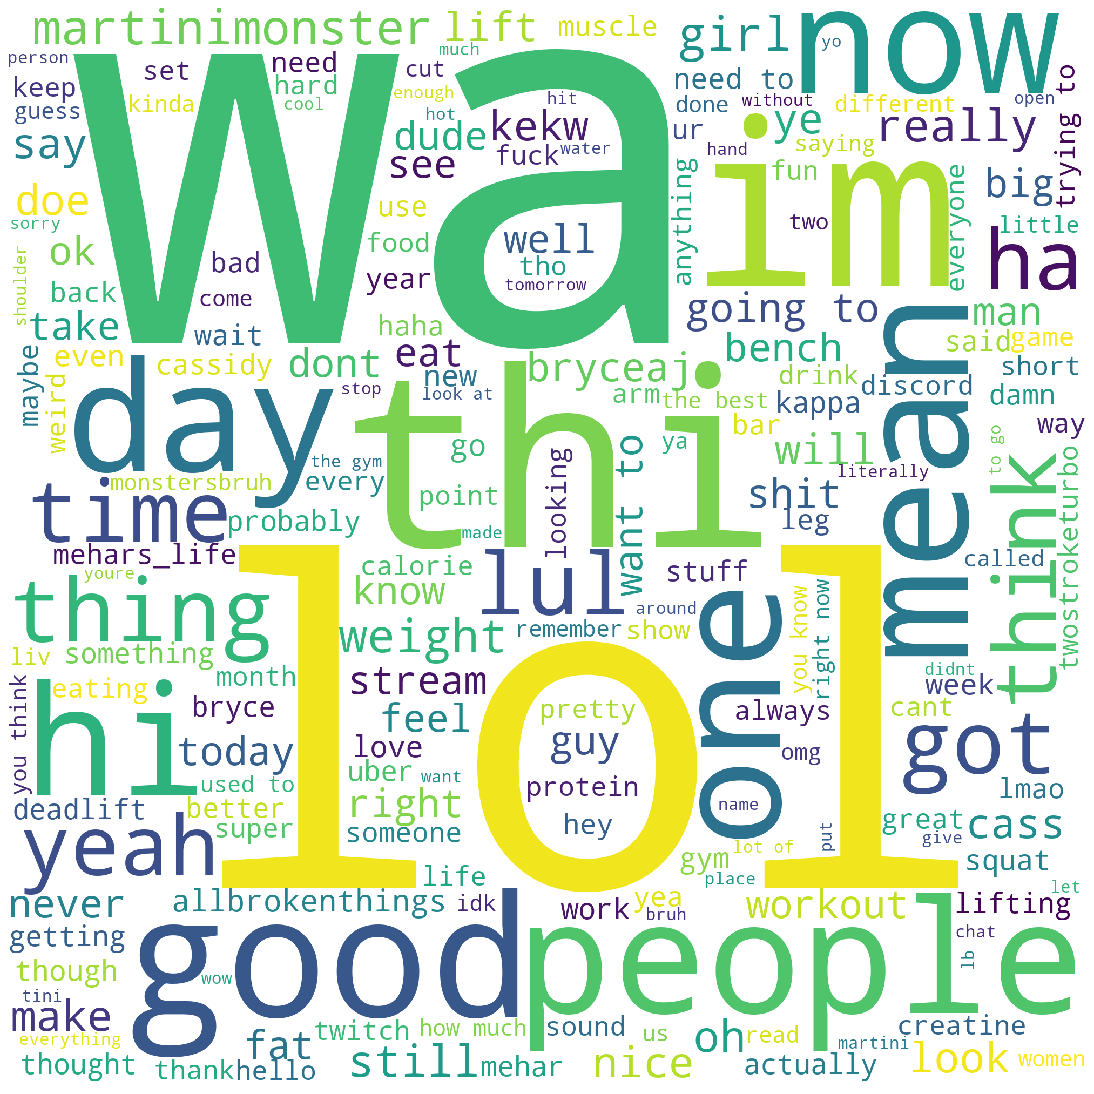

In [31]:
martonoChat = dfChat[dfChat['chatchannel'] == 'martinimonsters']

from wordcloud import WordCloud, STOPWORDS

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in martonoChat.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 2000, height = 2000, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (15, 15), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 